In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import annotate
import n_1rxi as method
import plot_utils

In [2]:
chunk_size = 10

In [3]:
fname = method.__file__.split('/')[-1][:-3].replace('x', str(chunk_size))
fname

'n_1r10i'

In [4]:
import rate
rate.setkey(1)

In [5]:
source = annotate.get_clean()

In [6]:
source = source.sample(frac=1, random_state=8)

In [7]:
await method.rate(source, chunk_size=chunk_size)

Request 1 of 423
Request 2 of 423
Request 3 of 423
Request 4 of 423
Request 5 of 423
Request 6 of 423
Request 7 of 423
Request 8 of 423
Request 9 of 423
Request 10 of 423
Request 11 of 423
Request 12 of 423
Request 13 of 423
Request 14 of 423
Request 15 of 423
Request 16 of 423
Request 17 of 423
Request 18 of 423
Request 19 of 423
Request 20 of 423
Request 21 of 423
Request 22 of 423
Request 23 of 423
Request 24 of 423
Request 25 of 423
Request 26 of 423
Request 27 of 423
Request 28 of 423
Request 29 of 423
Request 30 of 423
Request 31 of 423
Request 32 of 423
Request 33 of 423
Request 34 of 423
Request 35 of 423
Request 36 of 423
Request 37 of 423
Request 38 of 423
Request 39 of 423
Request 40 of 423
Request 41 of 423
Request 42 of 423
Request 43 of 423
Request 44 of 423
Request 45 of 423
Request 46 of 423
Request 47 of 423
Request 48 of 423
Request 49 of 423
Request 50 of 423
Request 51 of 423
Request 52 of 423
Request 53 of 423
Request 54 of 423
Request 55 of 423
Request 56 of 423
R

In [8]:
source.to_excel(f'gpt-ratings/{fname}.xlsx')

In [4]:
source = pd.read_excel(f'gpt-ratings/{fname}.xlsx').set_index('Unnamed: 0')

In [5]:
corr = {key: stats.spearmanr(source[[key.capitalize(), key]]) for key in annotate.measures}
corr

{'novelty': SignificanceResult(statistic=0.5992730075310098, pvalue=5.138650850032038e-120),
 'feasibility': SignificanceResult(statistic=0.6106164208919811, pvalue=9.286619722237988e-126),
 'value': SignificanceResult(statistic=0.29870966238505475, pvalue=1.3180210000792644e-26)}

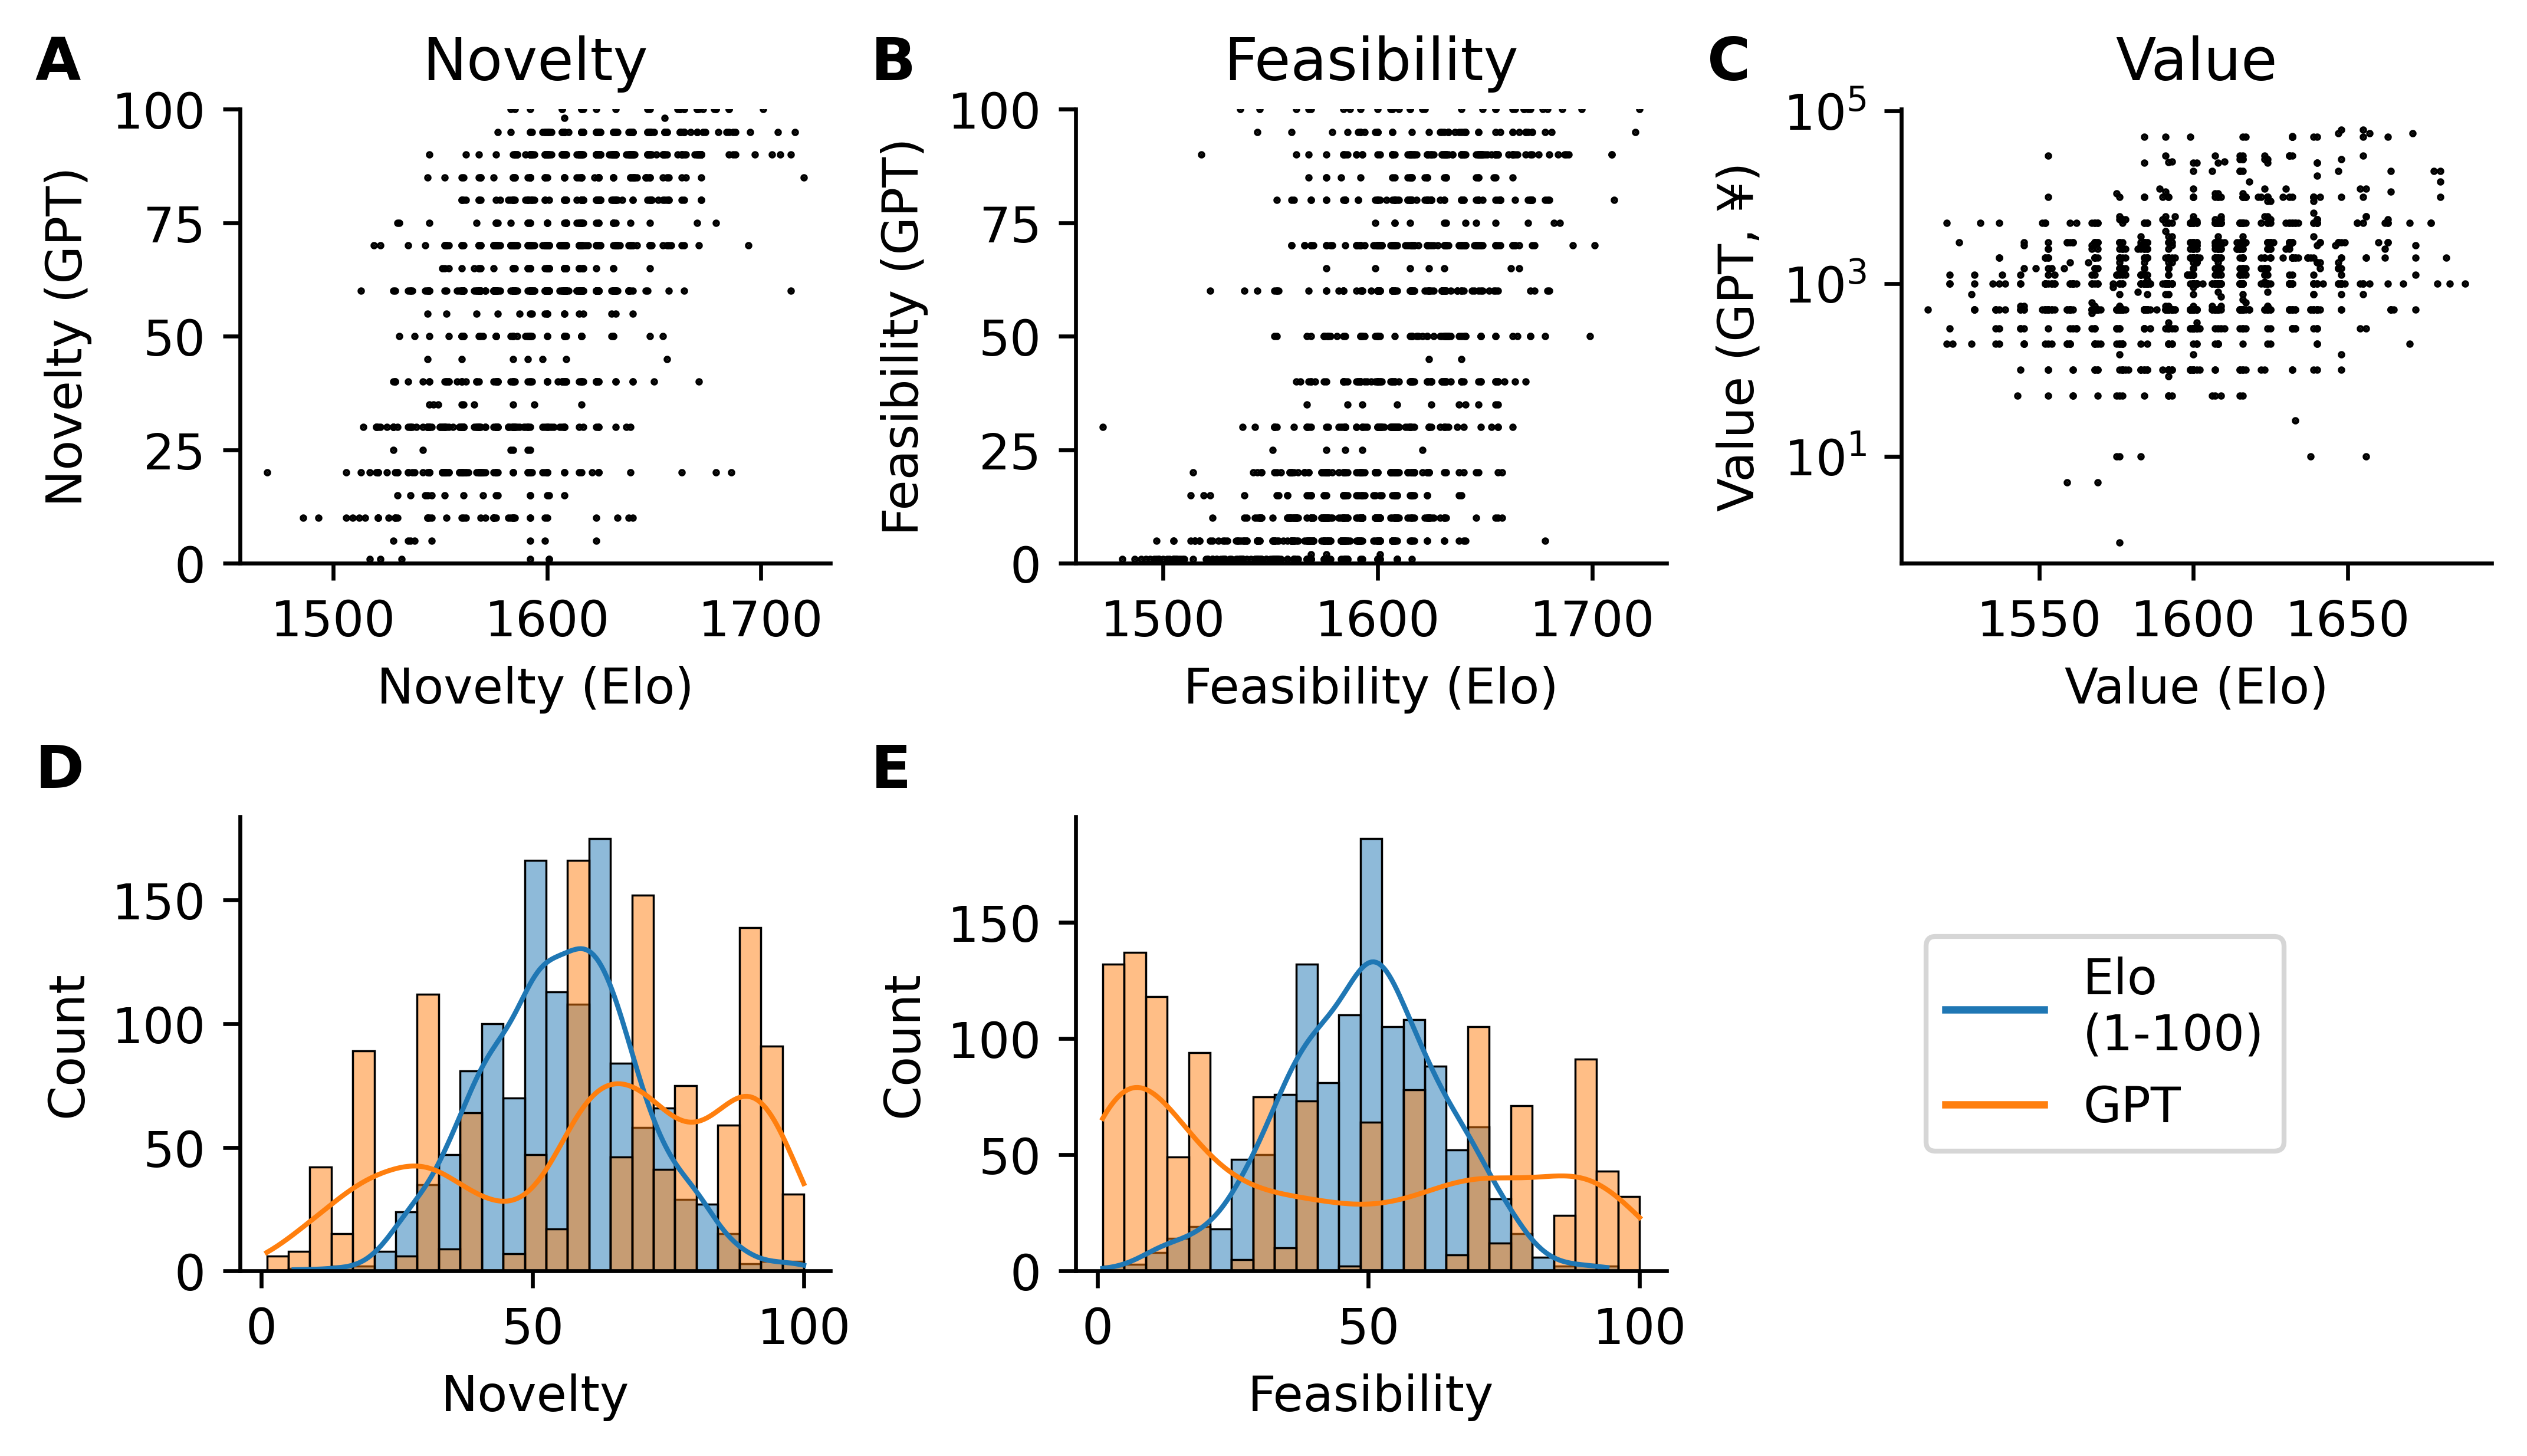

In [6]:
fig, axs = plt.subplots(2, 3, figsize=(7,4), layout='constrained', dpi=600)
for measure, ax in zip(annotate.measures, axs.T):
    Measure = measure.capitalize()
    if measure == 'value':
        mask = (source['value']>0) & (source['value']<100000)
        suffix = ', ¥'
        ax[0].semilogy(source[mask][Measure], source[mask][measure], 'ok', ms=.5)
    else:
        suffix = ''
        ax[0].plot(source[Measure], source[measure], 'ok', ms=.5)
    ax[0].set_xlabel(f'{Measure} (Elo)')
    ax[0].set_ylabel(f'{Measure} (GPT{suffix})')
    ax[0].set_title(Measure)
    if measure != 'value':
        ax[0].set_ylim(0,100)

    if measure != 'value':
        sns.histplot(source, x=f'{measure}_transformed', ax=ax[1], kde=True, bins=25, binrange=(1,100), line_kws={'lw':1})
        sns.histplot(source, x=measure, ax=ax[1], kde=True, bins=25, binrange=(1,100), line_kws={'lw':1})
        ax[1].set_xlabel(Measure)

axs[1,2].plot([], label='Elo\n(1-100)')
axs[1,2].plot([], label='GPT')
axs[1,2].legend(loc='center left')
axs[1,2].set_xticks([])
axs[1,2].set_yticks([])

sns.despine()
sns.despine(ax=axs[1,2], bottom=True, left=True)

for i, ax in enumerate(axs.flatten()):
    if i < 5:
        plot_utils.label_panel(ax, i)

plt.savefig(f'Figure_2.{fname}.pdf')

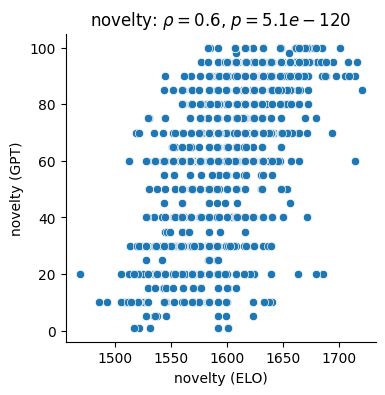

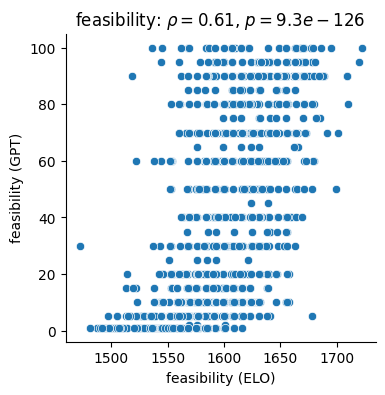

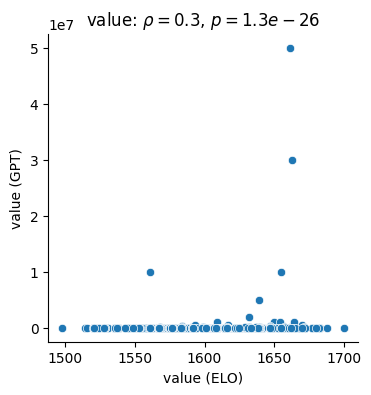

In [11]:
for key, c in corr.items():
    plt.figure(figsize=(4,4))
    sns.scatterplot(source, x=key.capitalize(), y=key)
    sns.despine()
    plt.xlabel(f'{key} (ELO)')
    plt.ylabel(f'{key} (GPT)')
    plt.title(f'{key}: $\\rho = {c.statistic:.2g}$, $p = {c.pvalue:.2g}$')

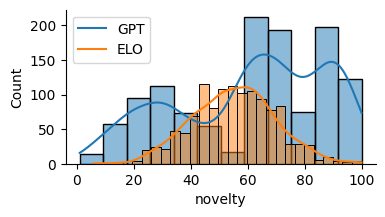

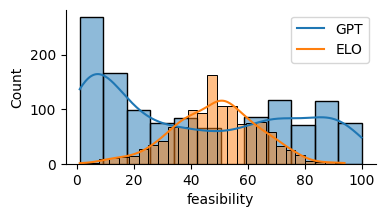

In [12]:
for key in ('novelty', 'feasibility'):
    fig, ax = plt.subplots(figsize=(4,2))
    sns.histplot(source, x=key, ax=ax, kde=True)
    sns.histplot(source, x=f'{key}_transformed', ax=ax, kde=True)
    sns.despine()
    plt.plot([], label='GPT')
    plt.plot([], label='ELO')
    plt.legend()

In [13]:
for idx, row in source[source['value']<0].iterrows():
    print(row['Question'], row['Answer'], row['value_explanation'], sep='\n', end='\n\n')

In [14]:
for idx, row in source[source['value'] > 100000].iterrows():
    print(row['Question'], row['Answer'], row['value'], row['value_idea_explanation'], row['value_explanation'], sep='\n', end='\n\n')

金属の鍵
造金
1000000
1. Idea: Use a metal key as a money-making tool.
Existing products achieving the same purpose: Coin minting machines, which can cost around 1,000,000 JPY.

ＣＤ
寝る
250000
2. Idea: Using a CD to sleep.
Existing products that serve the same purpose are beds, futons, etc. Their value ranges from 10,000 JPY to 500,000 JPY.

傘
パラシュート
150000
3. Idea: Use an umbrella as a parachute.
Existing products: Parachutes can cost from 100,000 to 1,000,000 JPY.

ストロー
家の建築
1000000
3. Idea: Use a straw for house construction.
Existing products: The cost of building materials for a house can range from millions to billions of yen.

新聞
エレベーター
2000000
2. Idea: Using a newspaper as an elevator.
Existing products: The cost of a real elevator installation can range from 500,000 to 2,000,000 JPY.

トイレットペーパー
家の建築
300000
5. Idea: Using toilet paper for building a house.
Existing products: Building materials like bricks, wood, etc. The cost of these can vary greatly, but let's say around 100,000 JPY 

Text(0.5, 1.0, 'value: $\\rho = 0.29$, $p = 3.2e-24$')

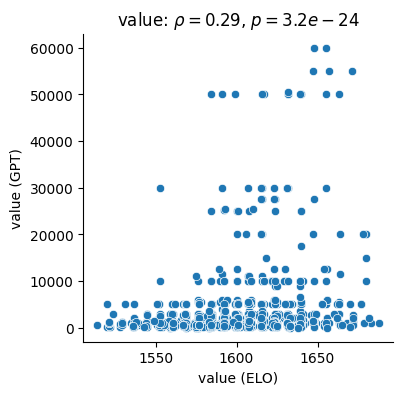

In [15]:
mask = (source['value']>0) & (source['value']<100000)
vcorr = stats.spearmanr(source[mask][['Value', 'value']])
plt.figure(figsize=(4,4))
sns.scatterplot(source[mask], x='Value', y='value')
sns.despine()
plt.xlabel(f'value (ELO)')
plt.ylabel(f'value (GPT)')
plt.title(f'value: $\\rho = {vcorr.statistic:.2g}$, $p = {vcorr.pvalue:.2g}$')

In [16]:
print(source[(source['Question']=='ボールペン')*(source['Answer']=='冷蔵庫')]['novelty_raw'].item())

3. Using a ballpoint pen as a refrigerator.
This idea is extremely novel, as it is very far removed from the typical use of a ballpoint pen. It's hard to imagine how a pen could function as a refrigerator.
{"novelty": 95}
